# Notebook UX
## Esse notebook tem como objetivo mostrar algumas formas de avaliar a jornada do usuário durante suas interações com o assistente

Existem muitas formas de avaliar um assistente, a mais comum é pela sua capacidade de encontrar a intenção correta dada a pergunta feita pelo usuário, mas essa não é a única. Em alguns casos o mais importante é avaliar a jornada do usuário na árvore de diálogo, saber qual a frequência em que cada nó é acessado, os fluxos mais utilizados, em quais nós os usuários desistem de interagir, etc.

## Frequência de acesso dos nós

Nesse notebook serão mostradas formas de obter algumas dessas métricas, começando por **encontrar a frequência em que cada nó é acessado**. Apesar de ser uma métrica simples, ela pode indicar os principais interesses dos clientes, quais são as informações que os clientes mais recebem do seu assistente, entre outras análises.

In [1]:
! pip install ibm_watson

In [2]:
import json
import ibm_watson

In [3]:
service=ibm_watson.AssistantV1(
    version='2019-02-28',
    iam_apikey='<api-key>',
    url='https://gateway.watsonplatform.net/assistant/api/'
)

Para simplificar a análise vamos utilizar apenas a primeira página dos logs armazenados. Utilize a paginação para aproveitar todos os logs armazenados durante o período disponível nos seu plano do Watson Assistant

In [4]:
list_logs_response=service.list_logs(
    workspace_id='<workspace-id>',
    sort='-request_timestamp'
).get_result()
print(json.dumps(list_logs_response, indent=2))

{Limited Output}

In [5]:
def get_dialog_stack(log):
    return {'stack': log['response']['output']['nodes_visited'], 
            'text': log['response']['output']['text'], 
            'conversation_id': log['response']['context']['conversation_id'],
            'input': log['response']['input']['text']
           }

In [19]:
dialogs = list(map(get_dialog_stack, list_logs_response['logs']))
dialogs

[{'stack': ['node_8_1559269166323'],
  'text': ['Para fazer uma ligação internacional, digite no seu celular:\n\n00 + código da nosso operadora + código do país + código da cidade + número do telefone.\n\nPor exemplo, se você está no Brasil e deseja ligar para Miami, nos Estados Unidos, digite: 00 + código da nosso operadora + 1 + 305 + número do telefone.'],
  'conversation_id': 'a2108423-ed5b-4f48-8074-f4ff150ef5f7',
  'input': 'como eu faço uma ligaçao internacional'},
 {'stack': ['slot_5_1552485685819',
   'handler_7_1552485685819',
   'node_1_1552485685818',
   'node_3_1552485685819'],
  'text': ['Você já consumiu 10 minutos do seu plano de voz, ainda restam 25 minutos para falar.'],
  'conversation_id': 'a2108423-ed5b-4f48-8074-f4ff150ef5f7',
  'input': '41656426811'},
 {'stack': ['node_1_1552485685818',
   'handler_6_1552485685819',
   'slot_5_1552485685819'],
  'text': ['Para consulta o seu saldo de minutos para falar vou precisar de alguns dados. Qual o seu CPF?'],
  'conversa

In [20]:
stacks = list(map(lambda x: x['stack'], dialogs))
stacks

[['node_8_1559269166323'],
 ['slot_5_1552485685819',
  'handler_7_1552485685819',
  'node_1_1552485685818',
  'node_3_1552485685819'],
 ['node_1_1552485685818', 'handler_6_1552485685819', 'slot_5_1552485685819'],
 ['Bem-vindo'],
 ['Bem-vindo'],
 ['slot_5_1552421210006',
  'handler_10_1552421210006',
  'node_7_1552421146168',
  'node_1_1552421528469'],
 ['slot_5_1552421210006', 'handler_3_1552421210007', 'slot_5_1552421210006'],
 ['slot_5_1552421210006', 'handler_3_1552421210007', 'slot_5_1552421210006'],
 ['slot_5_1552421210006', 'handler_3_1552421210007', 'slot_5_1552421210006'],
 ['slot_5_1552421210006', 'handler_3_1552421210007', 'slot_5_1552421210006'],
 ['node_8_1552413136446',
  'response_10_1566428425692',
  'node_7_1552421146168',
  'handler_3_1552421210007',
  'slot_5_1552421210006'],
 ['Em outros casos'],
 ['Bem-vindo'],
 ['Em outros casos'],
 ['node_6_1568130604702'],
 ['root'],
 ['node_2_1552315554957', 'node_5_1552318912321'],
 ['Bem-vindo'],
 ['node_6_1568130604702'],
 ['

In [13]:
from functools import reduce
from collections import Counter

In [21]:
complete_stack = reduce(lambda x, y: x + y, stacks)
complete_stack

['node_8_1559269166323',
 'slot_5_1552485685819',
 'handler_7_1552485685819',
 'node_1_1552485685818',
 'node_3_1552485685819',
 'node_1_1552485685818',
 'handler_6_1552485685819',
 'slot_5_1552485685819',
 'Bem-vindo',
 'Bem-vindo',
 'slot_5_1552421210006',
 'handler_10_1552421210006',
 'node_7_1552421146168',
 'node_1_1552421528469',
 'slot_5_1552421210006',
 'handler_3_1552421210007',
 'slot_5_1552421210006',
 'slot_5_1552421210006',
 'handler_3_1552421210007',
 'slot_5_1552421210006',
 'slot_5_1552421210006',
 'handler_3_1552421210007',
 'slot_5_1552421210006',
 'slot_5_1552421210006',
 'handler_3_1552421210007',
 'slot_5_1552421210006',
 'node_8_1552413136446',
 'response_10_1566428425692',
 'node_7_1552421146168',
 'handler_3_1552421210007',
 'slot_5_1552421210006',
 'Em outros casos',
 'Bem-vindo',
 'Em outros casos',
 'node_6_1568130604702',
 'root',
 'node_2_1552315554957',
 'node_5_1552318912321',
 'Bem-vindo',
 'node_6_1568130604702',
 'node_6_1568130604702',
 'node_6_156813

In [14]:
Counter(complete_stack)

Counter({'node_8_1559269166323': 1,
         'slot_5_1552485685819': 2,
         'handler_7_1552485685819': 1,
         'node_1_1552485685818': 2,
         'node_3_1552485685819': 1,
         'handler_6_1552485685819': 1,
         'Bem-vindo': 4,
         'slot_5_1552421210006': 10,
         'handler_10_1552421210006': 1,
         'node_7_1552421146168': 2,
         'node_1_1552421528469': 1,
         'handler_3_1552421210007': 5,
         'node_8_1552413136446': 1,
         'response_10_1566428425692': 1,
         'Em outros casos': 2,
         'node_6_1568130604702': 4,
         'root': 2,
         'node_2_1552315554957': 1,
         'node_5_1552318912321': 1})

In [15]:
! pip install wordcloud

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

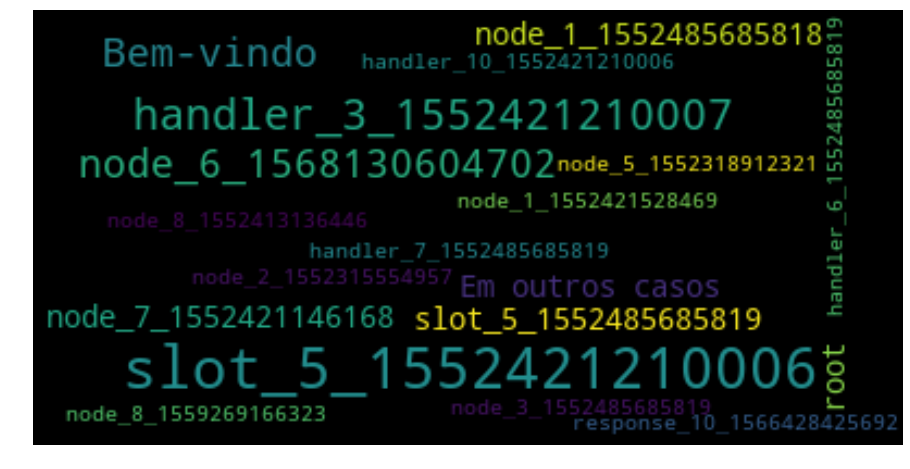

In [17]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=Counter(complete_stack))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Para pegar informações mais detalhadas de cada nós como o nome, as condições de entrada ou o texto mostrado ao usuário, basta utiliza a função **get_dialog_node**. Nem todos os nós possuem todas essas informações, mas com certeza apresentam alguma delas.

In [18]:
get_dialog_node_response=service.get_dialog_node(
    workspace_id='<workspace-id>',
    dialog_node='<dialog-node-id>'
).get_result()

print(json.dumps(get_dialog_node_response, indent=2))

{
  "type": "slot",
  "parent": "node_7_1552421146168",
  "variable": "$CPF",
  "dialog_node": "slot_5_1552421210006"
}


# Análise de fluxos

Se você conhece todos os nós da sua árvore de diálogo, você conhece o papel de cada um deles durante a conversa com o usuário. Por exemplo, se estamos construindo um assistente para uma operadora de telefonia possivelmente teremos fluxos, contendo vários nós, para que usuário posso migrar seu plano de internet. Nesse cenário teremos no mínimo um nó que reconhece a intenção do usuário de mudar o plano, iniciando o fluxo, e um nó final que efetiva a transação se todos os dados e requisitos do fluxo forem atendidos, encerrando o fluxo.

É muito importanto saber se o seu usuário está tendo uma boa experiência nesse fluxo e efetivamente alcança o objetivo, caso contrário, esse usuário provavelmente vai ligar no Call Center buscando pela solução o que queremos evitar. Se você pudesse notar que muitos deles desistem no meio do caminho em um nós específico, pode ser que você não esteja sendo claro suficiente e precisa alterá-lo.

- Uma forma de descobrir essas informações é com uma tabela de descrição de cada nó, a qual indica o papel que ele executa nos fluxos existentes. Dessa forma é possível utilizar os stacks mostrados anteriormente para associar a frequência de acesso dos nós com os seus respectivos fluxos. 

- Uma outra forma é utilizar flags no contexto ou na saída dos nós para identificá-los nos logs

- A terceira forma, que será mostrada a seguir, é utilizar Cloud Functions e um banco de dados externo para salvar em real-time a utilização dos fluxos 

### Utilizando Cloud Functions e um Banco de Dados externos

Apesar de aumentar um pouco a complexidade do processo de obtenção dessas informações, esses recursos permitem uma série de vantagens em relação ao uso dos logs nativos do Watson Assistant. A primeira vantagem é que os logs nativos possuem um períodos limitado de armazenamento, o segundo é que os curadores podem fazer o uso do banco de dados externo com os logs mesmo sem ter acesso direto às credenciais do Assistant, entre outras.

De forma simplificada, para utilizar essa técnica será preciso que cada nó da árvore inclua em um banco de dados que ele foi ativado e isso pode ser feito utilizando a funcionalidade de webhooks que agora aparece na aba Customize de qualquer nó. Será enviado para o banco de dados linhas como essas:

`
"{\"ponto\": \"início\", \"fluxo\": \"migrar_plano\"}"
"{\"ponto\": \"pesquisa\", \"fluxo\": \"migrar_plano\", \"nps\":\"@sys-number\"}"
`

A primeira indica que o nó de início do fluxo para migração de plano foi ativado e a segunda que o processo chegou ao fim e uma pesquisa de NPS foi apresentada ao usuário, inclusive com o valor apresentado. Nesse exemplo vamos salvar os logs no Cloudant que é um banco NoSQL com camada Lite na IBM Cloud.

In [22]:
! pip install cloudant

    100% |████████████████████████████████| 81kB 1.1MB/s ta 0:00:011


In [23]:
from cloudant import cloudant_iam 
from cloudant.query import Query

In [24]:
with cloudant_iam("<username>", "<iam-access-token>") as client:
    # Context handles connect() and disconnect() for you.
    # Perform library operations within this context.  Such as:
    db = client['<database-name>']
    documents = []
    for document in db:
        print(document)
        documents.append(document)

{'_id': '0424a089b0a280e18103b5fa98ad7c6c', '_rev': '1-167788ff00745f252ad70b1da3e82800', 'ponto': 'início', 'fluxo': 'migrar_plano'}
{'_id': '0a7a3f43d04f17ccc495cfff61731353', '_rev': '1-167788ff00745f252ad70b1da3e82800', 'ponto': 'início', 'fluxo': 'migrar_plano'}
{'_id': '0cd6471029ad139bd041ce9e5e07d2a4', '_rev': '1-372f0fc7074e52fda71cb158d260f907', 'ponto': 'mudou', 'fluxo': 'migrar_plano'}
{'_id': '417b57036504879bfdbb67a7b6d5a9a9', '_rev': '1-3ca379c62b3b092444d849e4f4417cb1', 'ponto': 'pesquisa', 'fluxo': 'migrar_plano', 'nps': '7'}
{'_id': '450c50b92c4ecb4573e6c3835ad6c24c', '_rev': '1-372f0fc7074e52fda71cb158d260f907', 'ponto': 'mudou', 'fluxo': 'migrar_plano'}
{'_id': '5ac3890d394071db8564d5203a929532', '_rev': '1-167788ff00745f252ad70b1da3e82800', 'ponto': 'início', 'fluxo': 'migrar_plano'}
{'_id': '92d2f7e1b49ccc3d045519f50a8d033f', '_rev': '1-167788ff00745f252ad70b1da3e82800', 'ponto': 'início', 'fluxo': 'migrar_plano'}
{'_id': 'a0e30ab419126b182fae2d55f5903586', '_rev'

In [29]:
import pandas as pd
import numpy as np
%matplotlib inline

In [26]:
df = pd.DataFrame.from_records(documents)
df.head(10)

,_id,_rev,fluxo,nps,ponto
0,0424a089b0a280e18103b5fa98ad7c6c,1-167788ff00745f252ad70b1da3e82800,migrar_plano,NaN,início
1,0a7a3f43d04f17ccc495cfff61731353,1-167788ff00745f252ad70b1da3e82800,migrar_plano,NaN,início
2,0cd6471029ad139bd041ce9e5e07d2a4,1-372f0fc7074e52fda71cb158d260f907,migrar_plano,NaN,mudou
3,417b57036504879bfdbb67a7b6d5a9a9,1-3ca379c62b3b092444d849e4f4417cb1,migrar_plano,7,pesquisa
4,450c50b92c4ecb4573e6c3835ad6c24c,1-372f0fc7074e52fda71cb158d260f907,migrar_plano,NaN,mudou
5,5ac3890d394071db8564d5203a929532,1-167788ff00745f252ad70b1da3e82800,migrar_plano,NaN,início
6,92d2f7e1b49ccc3d045519f50a8d033f,1-167788ff00745f252ad70b1da3e82800,migrar_plano,NaN,início
7,a0e30ab419126b182fae2d55f5903586,1-167788ff00745f252ad70b1da3e82800,migrar_plano,NaN,início
8,a0e30ab419126b182fae2d55f5badb67,1-372f0fc7074e52fda71cb158d260f907,migrar_plano,NaN,mudou
9,a612d316faf1124bbff24f5e679dc228,1-16f59d70fa8f17f3c050a46bc63b1366,migrar_plano,NaN,não_mudou


In [27]:
df.dtypes

_id      object
_rev     object
fluxo    object
nps      object
ponto    object
dtype: object

In [28]:
df['nps'] = pd.to_numeric(df['nps'])

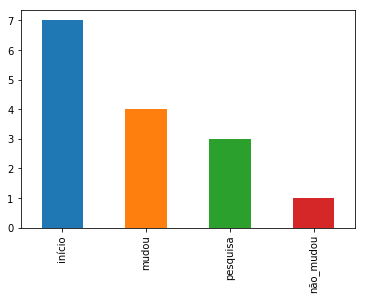

In [30]:
df['ponto'].value_counts().plot(kind='bar')

Nesse gráfico podemos ver uma distribuição simplificada do fluxo, com quantos usuários iniciaram, quantos mudaram de plano, quantos optaram por não mudar e quantos responderam a pesquisa. Em uma análise mais detalhada teríamos também os nós intermediários para identificar com bastante granularidade os pontos de desistência. Entretanto, essa análise já pode mostrar a efetividade do fluxo e mostrar a comparação com outros fluxos existêntes no qual foi feito o mesmo processo de avaliação.

In [31]:
np.nanmean(df['nps'])

4.666666666666667

Temos também um valor médio de NPS, uma métrica que tem sido utilizada por várias indústrias para indicar a experiência do usuário.

## Em breve mais análises possíveis